# GRIP Nov 2020 @ The Sparks Foundation

# Data Science & Business Analytics Internship

# TASK 1 : Prediction Using Supervised ML

## NAME : Brajesh Mohapatra

### Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
%matplotlib inline

### Reading Data Set

In [22]:
df = pd.read_csv('Student Scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Shape of Data

In [23]:
df.shape

(25, 2)

### Data Types

In [24]:
data_types = pd.DataFrame(df.dtypes, columns = ['Types'])
data_types

,Types
Hours,float64
Scores,int64


### Missing Values

In [25]:
missing_values = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_values

,Missing Values
Hours,0
Scores,0


### Numerical Analysis

In [26]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Correlation

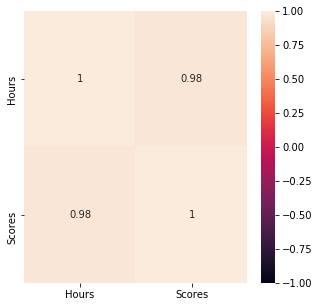

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.heatmap(df.corr(), vmax = 1, vmin = -1, square = False, annot = True)

        Scores are highly dependent on the amount of study hours.

### Relation Between Hours and Scores

Text(0, 0.5, 'Scores')

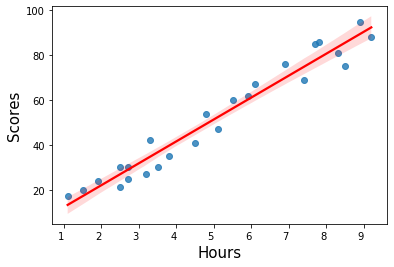

In [28]:
sns.regplot(x = df['Hours'], y = df['Scores'], line_kws = {'color': 'red'})
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)

        Higher the study hour, higher is the percentage.

### Analysing Hours

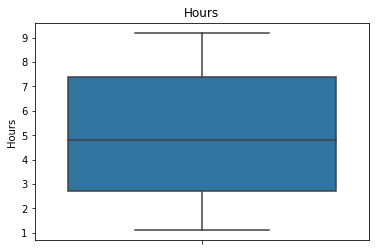

In [29]:
sns.boxplot(y = df['Hours'])
plt.title('Hours')
plt.show()

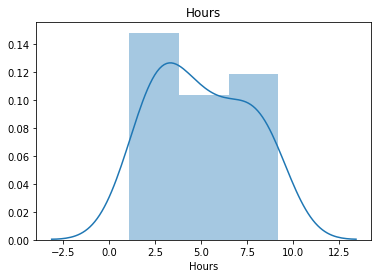

In [30]:
sns.distplot(df['Hours'])
plt.title('Hours')
plt.show()

### Analysing Scores

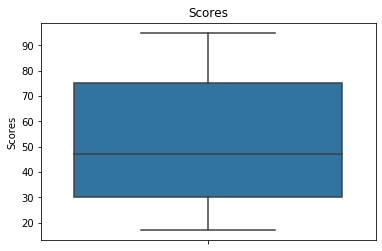

In [31]:
sns.boxplot(y = df['Scores'])
plt.title('Scores')
plt.show()

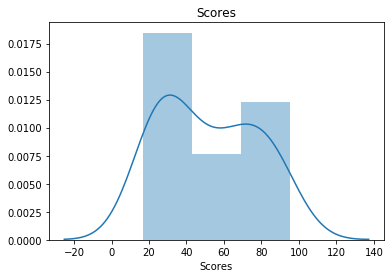

In [32]:
sns.distplot(df['Scores'])
plt.title('Scores')
plt.show()

### Train - Test Split

In [33]:
X = df.drop('Scores', axis = 1)
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

### Shapes of the Data Sets

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (8, 1), (17,), (8,))

### Checking with Statsmodels.api

In [35]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr = lr.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     295.0
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.83e-11
Time:                        11:58:59   Log-Likelihood:                -54.034
No. Observations:                  17   AIC:                             112.1
Df Residuals:                      15   BIC:                             113.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5609      3.383      0.757      0.4

C:\Users\Brajesh\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


### Test Data R2

In [36]:
X_test_sm = sm.add_constant(X_test)
y_pred_test = lr.predict(X_test_sm)
r2_score(y_test, y_pred_test)

0.9498016481178696

### R2 for Different Algorithms

In [37]:
models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), KNeighborsRegressor(), SVR(), XGBRegressor()]
model_names = ['LinearRegression', 'Lasso', 'Ridge', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'SVR', 'XGBRegressor']
r2_train = []
r2_test = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_train = y_pred_train.clip(0)
    y_pred_test = mod.predict(X_test)
    y_pred_test = y_pred_test.clip(0)
    r2_train.append(r2_score(y_train, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))
data = {'Modelling Algorithm' : model_names, 'Train R2' : r2_train, 'Test R2' : r2_test}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train R2'] - data['Test R2'])) * 100)/(data['Train R2'])
data.sort_values(by = 'Test R2', ascending = False)

,Modelling Algorithm,Train R2,Test R2,Difference
0,LinearRegression,0.951609,0.949802,0.189940
2,Ridge,0.951542,0.949667,0.197062
1,Lasso,0.951403,0.949453,0.204975
5,AdaBoostRegressor,0.989520,0.902028,8.841859
7,KNeighborsRegressor,0.948129,0.877720,7.426153
4,RandomForestRegressor,0.988008,0.857197,13.239874
6,GradientBoostingRegressor,0.999993,0.833274,16.672030
3,DecisionTreeRegressor,1.000000,0.831501,16.849941
9,XGBRegressor,1.000000,0.829148,17.085206
8,SVR,0.299566,0.381311,27.287713


        LinearRegression is the best algorithm to build the model.

### Final Model and Prediction

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Predicted Score'])
y_pred_test.head()

,Predicted Score
0,28.948922
1,26.994254
2,62.178280
3,74.883623
4,17.220913


### Mean Absolute Error

In [39]:
mean_absolute_error(y_test, y_pred_test)

3.9416011054125395

### Predict Score for a Certain Amount of Study Hour

In [40]:
hours = np.array([[9.25]])
predicted_score = regressor.predict(hours)
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted_score))

Hours = [[9.25]]
Predicted Score = [92.96430314]
